In [30]:
import pandas as pd
import cdsapi
import atlite
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_Central',skiprows=4)
df = df.merge(pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_North',skiprows=4))
df['index_time'] = pd.to_datetime(df["REF"].dt.strftime('%Y-%m-%d-%H'))
df = df.drop(columns=['REF'])
df = df.groupby(by=["index_time"], dropna=False).mean()

print(df.columns)

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [32]:
installed_capacity = [
    34.2,
    126.126,
    73,
    52,
    128.396,
    133.92
]

for i in range(len(df.columns)):
    df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
    df[df.columns[i]] = df[df.columns[i]]/installed_capacity[i]

data_actual = df.copy()
print(data_actual.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_24760\2237089100.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
C:\Users\595078\AppData\Local\Temp\ip

In [33]:
df = pd.DataFrame()
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2019_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2020_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2021_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2022_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = df.set_index('time_utcadj')

year = 2019
df = df.loc[df.index.year == year]
data_actual = data_actual.loc[data_actual.index.year == year]


In [34]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

In [35]:
for i in name_list:
    print(i)
    print('Acutal Gen MWh = ',np.round(data_actual[i].sum(),4))
    print('ERA5 Gen MWh = ',np.round(df[i].sum(),4))
    print('Diff from actual percen  = ', np.round((df[i].sum() - data_actual[i].sum())*100/data_actual[i].sum(),1))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal Gen MWh =  1251.924
ERA5 Gen MWh =  1475.2626
Diff from actual percen  =  17.8

EAN-N[R4_EAN-N(MW)]
Acutal Gen MWh =  1440.1622
ERA5 Gen MWh =  1511.0999
Diff from actual percen  =  4.9

NED-N[R1_NED-N(MW)]
Acutal Gen MWh =  1505.0685
ERA5 Gen MWh =  1512.8203
Diff from actual percen  =  0.5

SSP-N[R1_SSP-N(MW)]
Acutal Gen MWh =  1683.2798
ERA5 Gen MWh =  1512.8203
Diff from actual percen  =  -10.1

EAL-N[R4_EAL-N(MW)]
Acutal Gen MWh =  1598.4357
ERA5 Gen MWh =  1497.0786
Diff from actual percen  =  -6.3

EAP-N[R4_EAP-N(MW)]
Acutal Gen MWh =  1688.2344
ERA5 Gen MWh =  1500.2279
Diff from actual percen  =  -11.1



In [36]:
gen_difffromactual = pd.DataFrame()
for i in name_list:
    gen_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()) for j in range(12)]
    gen_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()) for j in range(12)]
    gen_difffromactual_list = [(gen_era5_month_list[j] - gen_actual_month_list[j]) for j in range(12)]
    gen_difffromactual[i] = pd.DataFrame(gen_difffromactual_list)
print('Diff from actual MWh  = \n',np.round(gen_difffromactual,1))

Diff from actual MWh  = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                     8.0                 14.9                  9.9   
1                     7.5                 15.4                 14.4   
2                    13.6                 21.3                 13.7   
3                    27.5                  7.2                  6.8   
4                   131.8                  3.9                 -4.4   
5                    34.5                 -0.4                 -1.9   
6                   -10.6                 -3.9                -13.6   
7                    -6.2                -15.3                -11.4   
8                    -3.4                  0.8                 -8.0   
9                    11.2                 10.1                  3.2   
10                   -6.2                  2.2                 -5.6   
11                   15.8                 14.7                  4.5   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-

In [37]:
for i in name_list:
    print(i)
    print('Acutal PF = ',np.round(data_actual[i].sum() * 100 /len(data_actual),4))
    print('ERA5 PF = ',np.round(df[i].sum() * 100 /len(df),4))
    print('Diff from actual percen  = ', np.round((df[i].sum() - data_actual[i].sum())*100/data_actual[i].sum(),1))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal PF =  14.2914
ERA5 PF =  16.8409
Diff from actual percen  =  17.8

EAN-N[R4_EAN-N(MW)]
Acutal PF =  16.4402
ERA5 PF =  17.25
Diff from actual percen  =  4.9

NED-N[R1_NED-N(MW)]
Acutal PF =  17.1811
ERA5 PF =  17.2696
Diff from actual percen  =  0.5

SSP-N[R1_SSP-N(MW)]
Acutal PF =  19.2155
ERA5 PF =  17.2696
Diff from actual percen  =  -10.1

EAL-N[R4_EAL-N(MW)]
Acutal PF =  18.247
ERA5 PF =  17.0899
Diff from actual percen  =  -6.3

EAP-N[R4_EAP-N(MW)]
Acutal PF =  19.2721
ERA5 PF =  17.1259
Diff from actual percen  =  -11.1



In [38]:
plantfactor_actual_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_actual_monthly[i] = pd.DataFrame(pf_month_list)

print("pf actual (%) = \n",np.round(plantfactor_actual_monthly*100,1))

pf actual (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    15.7                 15.0                 15.7   
1                    17.1                 16.9                 16.6   
2                    18.1                 18.0                 18.5   
3                    15.5                 19.2                 18.9   
4                     0.0                 17.1                 18.7   
5                    10.8                 16.1                 16.4   
6                    16.7                 15.2                 16.9   
7                    13.2                 13.6                 13.9   
8                    15.2                 15.7                 16.6   
9                    16.6                 17.3                 18.1   
10                   17.0                 16.6                 17.7   
11                   16.0                 16.8                 18.2   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP

In [39]:
plantfactor_era5_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_era5_monthly[i] = pd.DataFrame(pf_month_list)

print("pf era5 (%) = \n",np.round(plantfactor_era5_monthly*100,1))

pf era5 (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    16.7                 17.0                 17.0   
1                    18.2                 19.2                 18.7   
2                    19.9                 20.8                 20.4   
3                    19.4                 20.2                 19.9   
4                    17.7                 17.6                 18.1   
5                    15.6                 16.0                 16.1   
6                    15.3                 14.6                 15.1   
7                    12.4                 11.5                 12.3   
8                    14.7                 15.8                 15.5   
9                    18.1                 18.7                 18.5   
10                   16.2                 16.9                 16.9   
11                   18.1                 18.8                 18.8   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N

In [40]:
plantfactor_difffromactual = pd.DataFrame()
for i in name_list:
    pf_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    pf_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    pf_difffromactual_list = [( pf_era5_month_list[j] - pf_actual_month_list[j] ) / pf_actual_month_list[j] for j in range(12)]
    plantfactor_difffromactual[i] = pd.DataFrame(pf_difffromactual_list)
print("pf era5 diff from actual (%) = \n",np.round(plantfactor_difffromactual*100,1))

pf era5 diff from actual (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                     6.9                 13.4                  8.5   
1                     6.5                 13.5                 13.0   
2                    10.1                 15.9                 10.0   
3                    24.6                  5.2                  5.0   
4                     inf                  3.1                 -3.2   
5                    44.5                 -0.4                 -1.6   
6                    -8.6                 -3.5                -10.8   
7                    -6.4                -15.2                -11.0   
8                    -3.2                  0.7                 -6.7   
9                     9.1                  7.8                  2.4   
10                   -5.1                  1.9                 -4.4   
11                   13.3                 11.7                  3.4   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)

C:\Users\595078\AppData\Local\Temp\ipykernel_24760\2253039799.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  pf_difffromactual_list = [( pf_era5_month_list[j] - pf_actual_month_list[j] ) / pf_actual_month_list[j] for j in range(12)]


Measure, time series similarity

In [41]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

EAN-N[R4_EAN-N(MW)]


<Axes: xlabel='time_utcadj'>

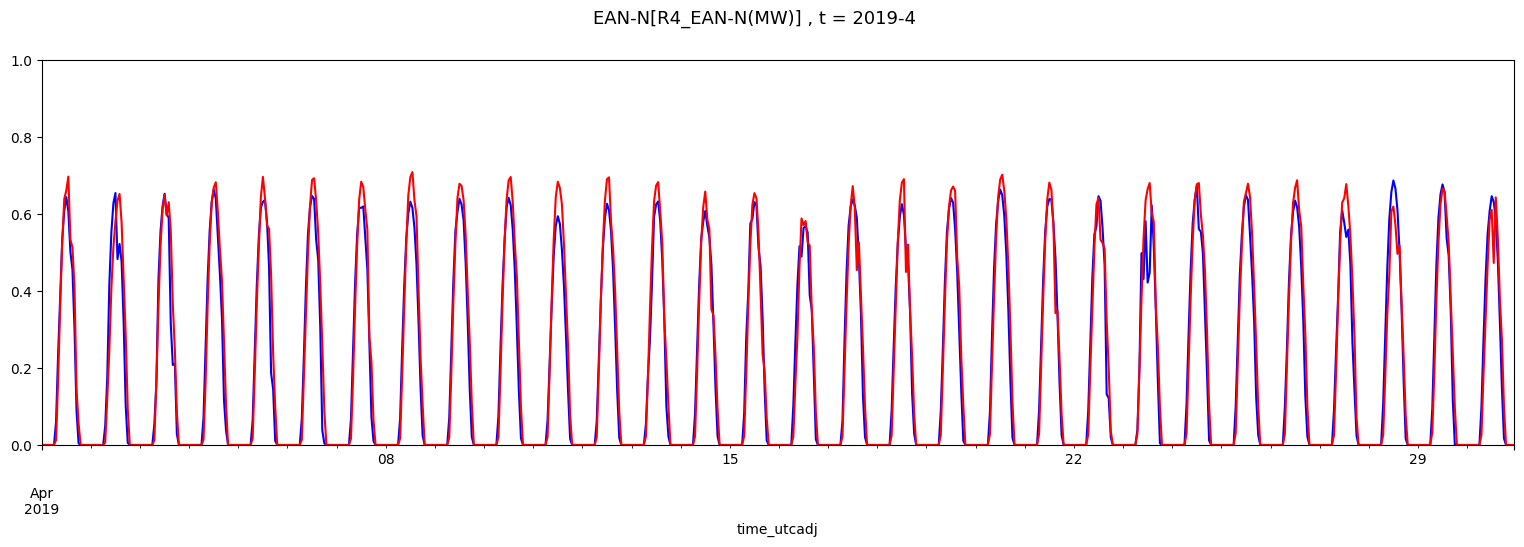

In [42]:
name_index = 1
month = 4
t = str(year) + '-' + str(month)
print(name_list[name_index])

fig, ax = plt.subplots(figsize=(19,5))
fig.suptitle(name_list[name_index] + ' , t = '+ t , fontsize=13)
# data_actual[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()
# df[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()
data_actual[name_list[name_index]].loc[t].plot(ax = ax,color = 'blue', ylim = (0,1))
df[name_list[name_index]].loc[t].plot(ax = ax,color = 'red', ylim = (0,1))


In [43]:
import numpy as np

def calc_euclidean(actual, predic):
    return np.round(np.sqrt(np.sum((actual - predic) ** 2)),3)

def calc_mae(actual, predic):
    return np.round(np.mean(np.abs((actual - predic))),3)


print(" year ======   ",year)
print("                   ")
for name_index in range(len(name_list)):
    ts = pd.DataFrame()
    ts['actual'] = data_actual[name_list[name_index]]
    ts['era5'] = df[name_list[name_index]]
    ## Pearson Correlation ##   
    print('plant = ', name_list[name_index])
    print("          ")
    print("     correalation     ")
    print(ts.loc[ts['actual'] > 0].corr())
    print("          ")
    print('calc_euclidean',calc_euclidean(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print('calc_mae = ',calc_mae(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print("     ")


 year ======    2019
                   
plant =  BCPG-N[MCC_BCP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.859626
era5    0.859626  1.000000
          
calc_euclidean 7.228
calc_mae =  0.086
     
plant =  EAN-N[R4_EAN-N(MW)]
          
     correalation     
        actual    era5
actual  1.0000  0.8533
era5    0.8533  1.0000
          
calc_euclidean 7.571
calc_mae =  0.089
     
plant =  NED-N[R1_NED-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.829285
era5    0.829285  1.000000
          
calc_euclidean 8.515
calc_mae =  0.099
     
plant =  SSP-N[R1_SSP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.871594
era5    0.871594  1.000000
          
calc_euclidean 9.551
calc_mae =  0.114
     
plant =  EAL-N[R4_EAL-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.809567
era5    0.809567  1.000000
          
calc_euclidean